In [1]:
# --- Load Agents --- #
from agent_reinforce.agent import REINFORCEAgent
from agent_deepqn.agent import DeepQAgent
from agent_ddpg.agent import DDPG_Agent

# --- Load Environments --- #
from environment.grid import GridEnv

# --- Load Necessary --- #
from collections import deque
import numpy as np
from utilities.helper import flatten


# --- Load Training --- #
from training import train
from utilities.monitor import render_save_graph
from experiment import Experiment

%load_ext autoreload
%autoreload 2



C:\Users\danie\anaconda3\envs\drlnd\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


ImportError: cannot import name 'train'

## Grid Environment with DQN

In [11]:
env = GridEnv(num_agent = 1, agents_start = [(1,1)], goals_start=[(7,7)])
agents = [DeepQAgent(env.state_space, env.action_space.n)]
score_history = train(Experiment("Fixed start - Fixed goal - DQN", env, agents))
# render_save_graph(score_history, config = agents[0].config, save=False)


Final Self players:  [(1, 1)]
Final Self goals:  [(7, 7)]
 Total score (averaged over agents) 980 episode: 9.0 | 	Avarage in last 100 is -22.61

## Grid Environment with REINFORCE

In [12]:
env = GridEnv(num_agent = 1, agents_start = [(1,1)], goals_start=[(7,7)])
agents = [REINFORCEAgent(env.state_space, env.action_space.n)]
score_history = train(Experiment("Fixed start - Fixed goal - REINFORCE", env, agents, num_episodes=1000, max_t=10))
# render_save_graph(score_history, config = agents[0].config, save=False)



Final Self players:  [(1, 1)]
Final Self goals:  [(7, 7)]
 Total score (averaged over agents) 980 episode: -10.0 | 	Avarage in last 100 is -10.0

## Grid environment with DDPG

In [14]:
env = GridEnv(num_agent = 1, agents_start = [(1,1)], goals_start=[(4,4)], grid_size = 5, render_board= False)
agents = [DDPG_Agent(env.state_space, env.action_space.n)]
score_history = train(Experiment("Grid 5 - Fixed start - Fixed goal - DDPG", env, agents, max_t=300, num_episodes = 100))


Final Self players:  [(1, 1)]
Final Self goals:  [(4, 4)]

--- Agent Params ---
Going to train on cpu
Learning Rate:: Actor: 0.0001 | Critic: 0.0001
Replay Buffer:: Buffer Size: 100000 | Sampled Batch size: 100

Actor paramaters:: Input: 4 | Hidden Layers: [32] | Output: 4
Critic paramaters:: Input: 4 | Hidden Layers: [36] | Output: 1
Actor(
  (fc_in): Linear(in_features=4, out_features=32, bias=True)
  (fc_out): Linear(in_features=32, out_features=4, bias=True)
)
Critic(
  (fc_in): Linear(in_features=4, out_features=32, bias=True)
  (fc_out): Linear(in_features=36, out_features=1, bias=True)
)
Output type is: probs


/Users/mark/Dev/multi-drl/agent_ddpg/model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.output_calc(x)
 Total score (averaged over agents) 80 episode: -55.0 | 	Avarage in last 100 is -36.32098765432099

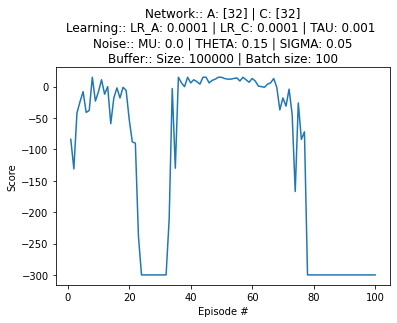

In [14]:
render_save_graph(score_history, config = agents[0].config, save=False)

# Experiment